# Intro to Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_moons

%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 8)
sns.set_theme()
sns.set_context("talk")

# Toy dataset

## Data generation

In [2]:
n_points = 100

# data, labels = make_blobs(n_samples=n_points, n_features=2, centers=3, cluster_std=1, center_box=[-10,10])
data = np.loadtxt('toy-dataset.txt', unpack=True).transpose()
labels = np.loadtxt('toy-labels.txt', unpack=True)

# np.savetxt('toy-dataset.txt', data, fmt="%.3f", header="x   y")
# np.savetxt('toy-labels.txt', labels, fmt="%.3f", header="labels")

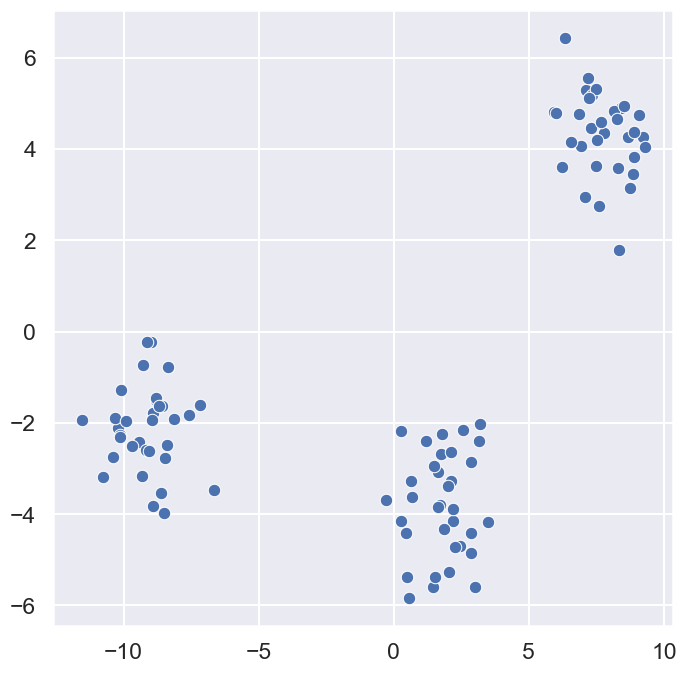

In [3]:
sns.scatterplot(x=data[:, 0], y=data[:, 1])
plt.show()

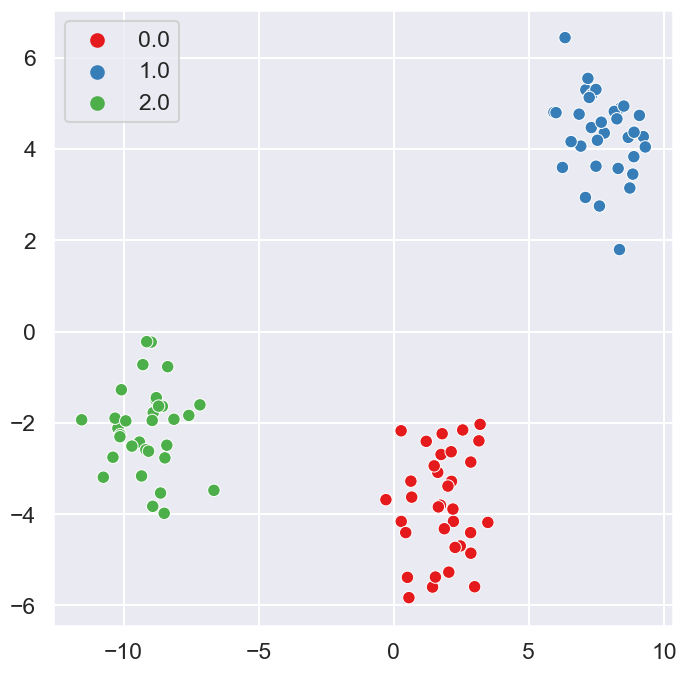

In [4]:
sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=labels, palette="Set1")
plt.show()

## Measure of the internal quality

### Pathological situations for comparison

Several situations are assumed: the true partition, a random partitiona , a two-cluster partition and a 20-cluster partition.


#### Really bad case : 3 random clusters

We split our dataset in a completely random way, but in the right number of classes (3).

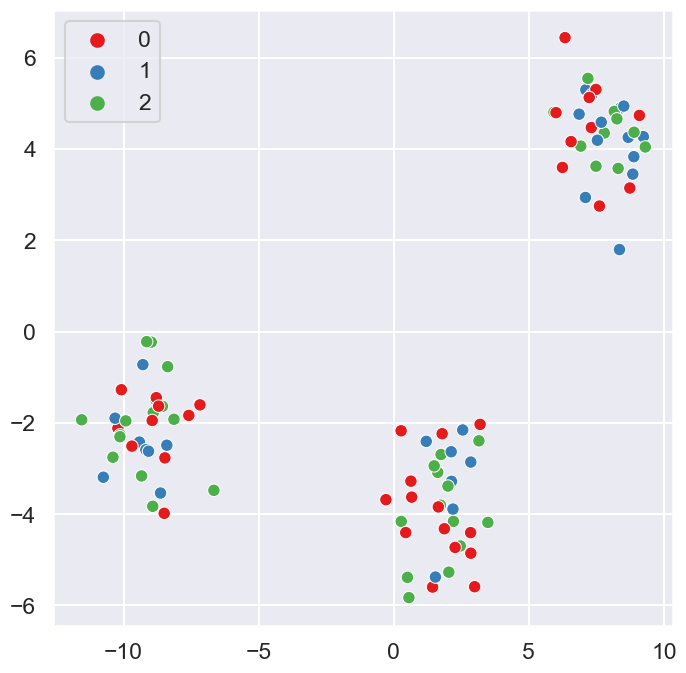

In [5]:
random_clusters = np.random.randint(0, 3, n_points)

sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=random_clusters, palette="Set1")
plt.show()

#### Only two clusters

Let be a partition in two clusters obtained by k-means.

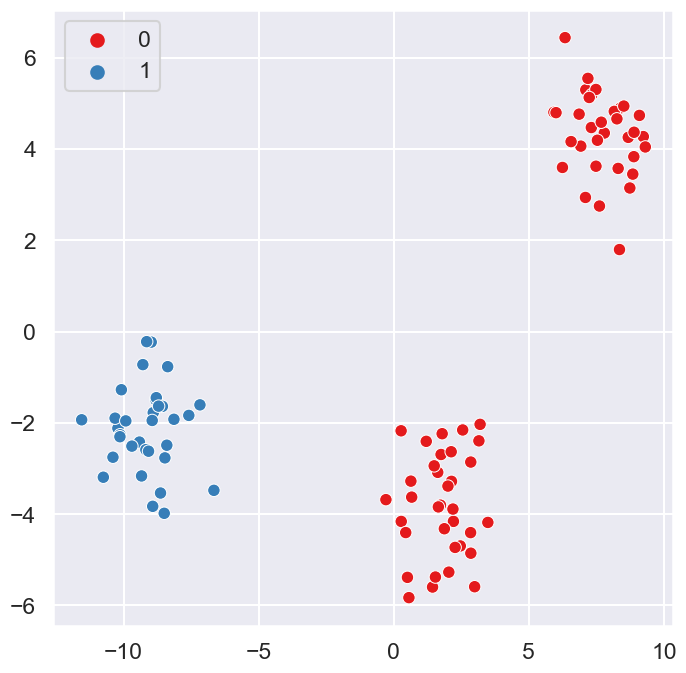

In [6]:
from sklearn.cluster import KMeans

twogroups_clusters = KMeans(2).fit_predict(data)

sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=twogroups_clusters, palette="Set1")
plt.show()

#### Too many clusters

Finally, we find ourselves in a situation with an "absurd" partition in a much too high number of clusters.

[ 8 10 19  2  8  4  5  8  8  0  4 16 12  4  6 14  4 13 17  2 16  1  8 11
  7 10 16 19 14  0  2 11 15  3  5  7 18  6 12 12  6  0  0  8 17  8 10 15
  5 17 17  0  3  5  9  4 12 12 19  5  3  5  3  3  9 10 12  9  8  2  3  5
  6  0  9 10  9  1  1 12 16  6  2 14 11  5 12  8  6  5  7  2  6 10 19  3
  7 11 17 19]


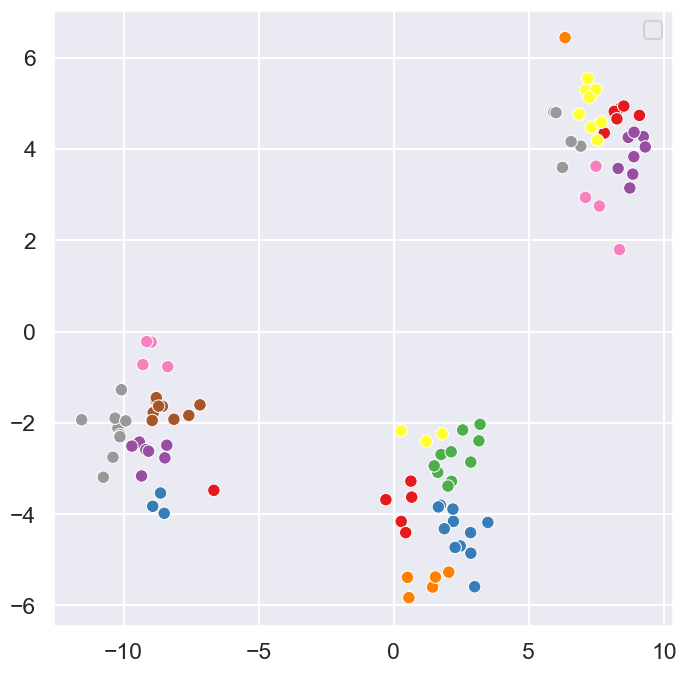

In [7]:
many_clusters = KMeans(20).fit_predict(data)
print(many_clusters)

sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=many_clusters, palette="Set1")
plt.legend("")
plt.show()

### Silhouette scores

In [8]:
from sklearn.metrics import silhouette_score

print("Silhouette true labels    : %.2f" % silhouette_score(data, labels))
print("Silhouette random clusters: %.2f" % silhouette_score(data, random_clusters))
print("Silhouette two clusters   : %.2f" % silhouette_score(data, twogroups_clusters))
print("Silhouette many clusters  : %.2f" % silhouette_score(data, many_clusters))

Silhouette true labels    : 0.83
Silhouette random clusters: -0.07
Silhouette two clusters   : 0.66
Silhouette many clusters  : 0.39


We notice that the silhouette score increases with the subjective quality of the partition.

#### Silhouette plot

[Here](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html), you can find a detailed Python code to draw Silhouette plots for a different number of clusters and perform Silhouette analysis appropriately to find the most appropriate cluster. 
We will simply use [`YellowBrick`](https://www.scikit-yb.org/en/latest/index.html), a machine learning visualization library to draw the silhouette plots and perform comparative analysis.

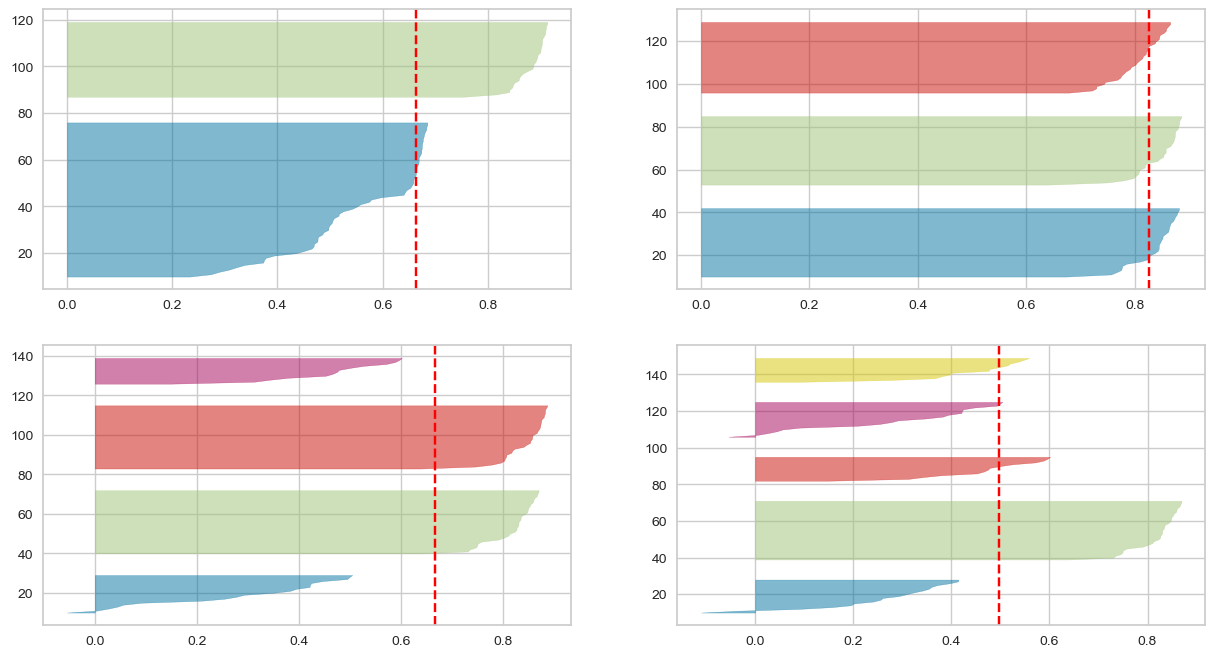

In [9]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data)

### Calinski Harabasz

In [10]:
from sklearn.metrics import calinski_harabasz_score

print("Calinski Harabasz true labels    : %.2f" % calinski_harabasz_score(data, labels))
print("Calinski Harabasz random clusters: %.2f" % calinski_harabasz_score(data, random_clusters))
print("Calinski Harabasz two clusters   : %.2f" % calinski_harabasz_score(data, twogroups_clusters))
print("Calinski Harabasz many clusters  : %.2f" % calinski_harabasz_score(data, many_clusters))

Calinski Harabasz true labels    : 1549.85
Calinski Harabasz random clusters: 1.14
Calinski Harabasz two clusters   : 225.78
Calinski Harabasz many clusters  : 1001.50


### Davies-Bouldin

In [11]:
from sklearn.metrics import davies_bouldin_score

print("Davies-Bouldin true labels    : %.2f" % davies_bouldin_score(data, labels))
print("Davies-Bouldin random clusters: %.2f" % davies_bouldin_score(data, random_clusters))
print("Davies-Bouldin two clusters   : %.2f" % davies_bouldin_score(data, twogroups_clusters))
print("Davies-Bouldin many clusters  : %.2f" % davies_bouldin_score(data, many_clusters))

Davies-Bouldin true labels    : 0.24
Davies-Bouldin random clusters: 10.60
Davies-Bouldin two clusters   : 0.45
Davies-Bouldin many clusters  : 0.66


## Measure of the external quality

### Purity

In [12]:
from sklearn.metrics.cluster import contingency_matrix

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    CM = contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(CM, axis=0)) / np.sum(CM)


print("Purity score true labels    : %.2f" % purity_score(labels, labels))
print("Purity score random clusters: %.2f" % purity_score(labels, random_clusters))
print("Purity score two clusters   : %.2f" % purity_score(labels, twogroups_clusters))
print("Purity score many clusters  : %.2f" % purity_score(labels, many_clusters))

Purity score true labels    : 1.00
Purity score random clusters: 0.42
Purity score two clusters   : 0.67
Purity score many clusters  : 1.00


# Clusterings Comparison

## Contingency Table

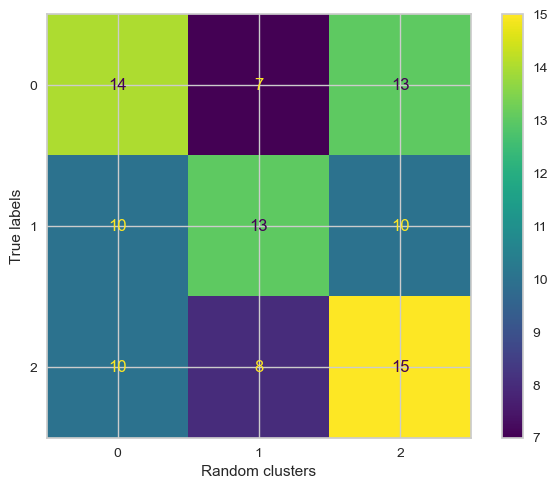

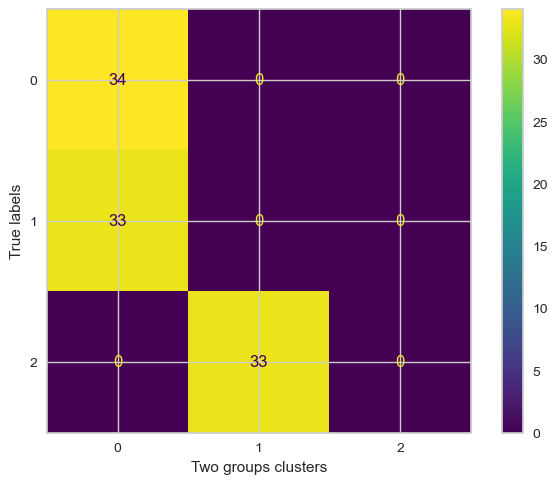

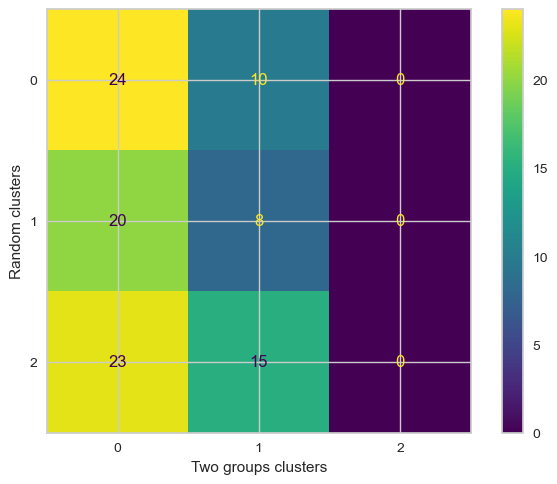

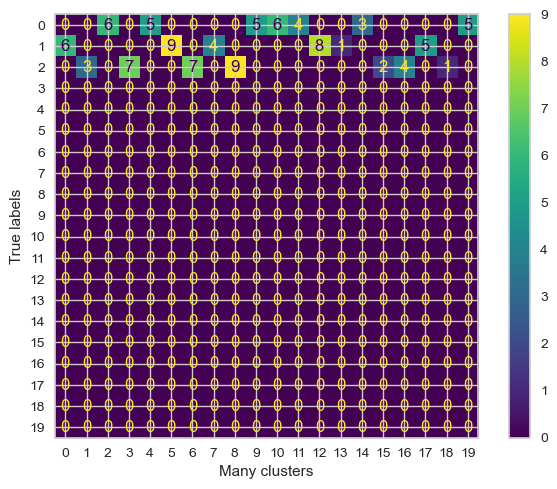

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay(confusion_matrix(labels, random_clusters)).plot()
plt.xlabel('Random clusters')
plt.ylabel('True labels')

ConfusionMatrixDisplay(confusion_matrix(labels, twogroups_clusters)).plot()
plt.xlabel('Two groups clusters')
plt.ylabel('True labels')

ConfusionMatrixDisplay(confusion_matrix(random_clusters, twogroups_clusters)).plot()
plt.xlabel('Two groups clusters')
plt.ylabel('Random clusters')

ConfusionMatrixDisplay(confusion_matrix(labels, many_clusters)).plot()
plt.xlabel('Many clusters')
plt.ylabel('True labels')

plt.show()

## Rand Index Score

In [14]:
from sklearn.metrics.cluster import rand_score

print("Rand Index true labels vs. two clusters    : %.2f" % rand_score(labels, twogroups_clusters))
print("Rand Index true labels vs. random clusters : %.2f" % rand_score(labels, random_clusters))
print("Rand Index random clusters vs. two clusters: %.2f" % rand_score(random_clusters, twogroups_clusters))

Rand Index true labels vs. two clusters    : 0.77
Rand Index true labels vs. random clusters : 0.56
Rand Index random clusters vs. two clusters: 0.48
